### This exercise was completed in class on Thursday, Feb. 18.  
Last three questions left as homework.

In [1]:
# Standard imports need to execute before your code.
import saspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

---
**Q1**: How do I find out what the "results=HTML" option does?

In [2]:
sas = saspy.SASsession(cfgname="oda", results='HTML')

SAS Connection established. Subprocess id is 4000



---
**Q2**: Complete this code to create an object called "heart" which can access the SASHELP.HEART data set.

In [3]:
heart = sas.sasdata('heart', 'sashelp')

---
**Q3**: Complete this code to print out the first 9 records from the SASHELP.HEART data set.

In [4]:
heart.head(9)

Obs,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
1,Dead,Other,.,Female,29,62.50,140,78,124,121,0,55,.,,Normal,Overweight,Non-smoker
2,Dead,Cancer,.,Female,41,59.75,194,92,144,183,0,57,181,Desirable,High,Overweight,Non-smoker
3,Alive,,.,Female,57,62.25,132,90,170,114,10,.,250,High,High,Overweight,Moderate (6-15)
4,Alive,,.,Female,39,65.75,158,80,128,123,0,.,242,High,Normal,Overweight,Non-smoker
5,Alive,,.,Male,42,66.00,156,76,110,116,20,.,281,High,Optimal,Overweight,Heavy (16-25)
6,Alive,,.,Female,58,61.75,131,92,176,117,0,.,196,Desirable,High,Overweight,Non-smoker
7,Alive,,.,Female,36,64.75,136,80,112,110,15,.,196,Desirable,Normal,Overweight,Moderate (6-15)
8,Dead,Other,.,Male,53,65.50,130,80,114,99,0,77,276,High,Normal,Normal,Non-smoker
9,Alive,,.,Male,35,71.00,194,68,132,124,0,.,211,Borderline,Normal,Overweight,Non-smoker


---
**Q4**: What method would I use to get information about each column?

In [5]:
heart.columnInfo()

---
**Q5:** In SAS we can execute the following code to get information about a SAS dataset:
```
proc contents data=sashelp.heart;
run;
```

How can we get the same information using the **heart** object?

In [6]:
heart.contents()

---
**Q6:** Produce a Heat Map of *Weight* versus *Systolic*


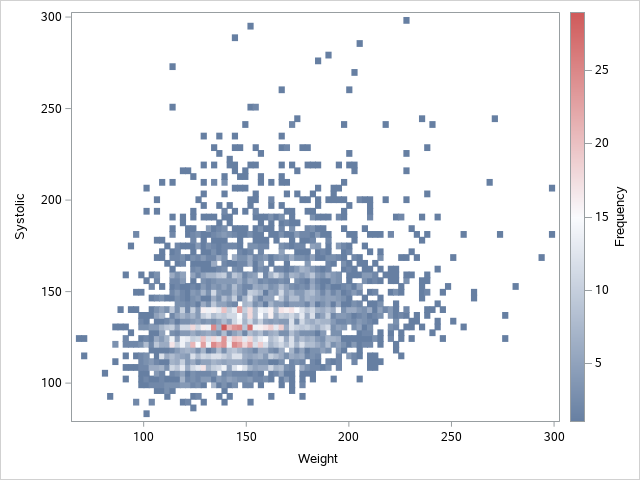

In [7]:
heart.heatmap('Weight', 'SYSTOLIC')

---
**Q7:** Create a DataFrame with using the SASHELP.HEART data set and print the first 9 records. 

In [8]:
heart_df = sas.sasdata2dataframe('heart', 'sashelp')
heart_df.head(9)

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,0.0,55.0,NaN,NaN,Normal,Overweight,Non-smoker
1,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,0.0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,Alive,NaN,NaN,Female,57,62.25,132.0,90,170,114.0,10.0,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,Alive,NaN,NaN,Female,39,65.75,158.0,80,128,123.0,0.0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,Alive,NaN,NaN,Male,42,66.00,156.0,76,110,116.0,20.0,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)
5,Alive,NaN,NaN,Female,58,61.75,131.0,92,176,117.0,0.0,NaN,196.0,Desirable,High,Overweight,Non-smoker
6,Alive,NaN,NaN,Female,36,64.75,136.0,80,112,110.0,15.0,NaN,196.0,Desirable,Normal,Overweight,Moderate (6-15)
7,Dead,Other,NaN,Male,53,65.50,130.0,80,114,99.0,0.0,77.0,276.0,High,Normal,Normal,Non-smoker
8,Alive,NaN,NaN,Male,35,71.00,194.0,68,132,124.0,0.0,NaN,211.0,Borderline,Normal,Overweight,Non-smoker


---
**Q8:** Generate a correlation matrix of all numeric variables.
Which 2 variables have the strongest correlation?

In [53]:
heart_df.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,0.003629
AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,0.273415
Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,-0.079587
Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,0.072428
Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,0.183364
Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,0.199350
MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,0.137355
Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,-0.011780
AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,0.078444
Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,1.000000


---
**Q8:** Given the output of the following code:

In [9]:
print(heart_df['Systolic'][4])
print(heart_df['Diastolic'][4])
print(heart_df['Weight'][4])

110
76
156.0


How would I format the following print statement to output:
```
Blood Pressure was 110/76 and Weight was 156.0
```
for the first 5 records in the data frame?

In [12]:
for i in range(0,5):
    print(f"Blood Pressure was {heart_df['Systolic'][i]}/{heart_df['Diastolic'][i]} and Weight was {heart_df['Weight'][i]}")

Blood Pressure was 124/78 and Weight was 140.0
Blood Pressure was 144/92 and Weight was 194.0
Blood Pressure was 170/90 and Weight was 132.0
Blood Pressure was 128/80 and Weight was 158.0
Blood Pressure was 110/76 and Weight was 156.0
